<a href="https://colab.research.google.com/github/jigjid/github_task/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
import numpy as np
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error, accuracy_score
from numpy import mean
from numpy import std
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from matplotlib import pyplot
from sklearn.ensemble import StackingClassifier


In [ ]:
house_data = pd.read_csv('train.csv')

data = house_data.loc[:,['GrLivArea','YearBuilt','SalePrice']]
print("Null values of the data is \n{}".format(data.isnull().sum()))

X = data.loc[:,['GrLivArea','YearBuilt']].to_numpy()
y = data.loc[:,['SalePrice']].to_numpy()

scaler = StandardScaler()
X_train = scaler.fit_transform(X)

Null values of the data is 
GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64


###**【Problem 1】**Scratch implementation of blending

Scratch blending should be at least three examples of how it is more accurate than a single model. Increased accuracy means that the mean squared error (MSE) on the validation data is reduced.

In [ ]:
clf1 = tree.DecisionTreeClassifier()
clf2 = LogisticRegression(multi_class='multinomial', random_state=1)
clf3 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf = VotingClassifier(estimators=[ ('dtc', clf1), ('lgr', clf2), ('rfc', clf3)], voting='soft', verbose=True)


eclf = eclf.fit(X_train,y)
y_pred = eclf.predict(X_train)
mse = mean_squared_error(y, y_pred)
acc = accuracy_score(y,y_pred)

print('mean squared error is {}'.format(mse))
print('accuracy score: {}'.format(acc))
print(f"Estimators: {len(eclf.estimators_)}")

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[Voting] ...................... (1 of 3) Processing dtc, total=   0.1s
[Voting] ...................... (2 of 3) Processing lgr, total=   1.8s
[Voting] ...................... (3 of 3) Processing rfc, total=   1.6s
mean squared error is 37016364.193835616
accuracy score: 0.9452054794520548
Estimators: 3


###**【Problem 2】**Scratch implementation of bagging

In [ ]:
clf1 = tree.DecisionTreeClassifier()
clf2 = LogisticRegression(multi_class='multinomial', random_state=1)
clf3 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf = VotingClassifier(estimators=[ ('dtc', clf1), ('lgr', clf2), ('rfc', clf3)], voting='soft', verbose=True)

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=123, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

eclf = eclf.fit(x_train, y_train)
y_pred = eclf.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
acc = accuracy_score(y_train,y_pred)

print('mean squared error is {}'.format(mse))
print('accuracy score: {}'.format(acc))
print(f"Estimators: {len(eclf.estimators_)}")

[Voting] ...................... (1 of 3) Processing dtc, total=   0.1s
[Voting] ...................... (2 of 3) Processing lgr, total=   2.1s
[Voting] ...................... (3 of 3) Processing rfc, total=   2.8s
mean squared error is 18961540.8125
accuracy score: 0.949486301369863
Estimators: 3


In [ ]:
from sklearn.ensemble import BaggingClassifier
bgg = BaggingClassifier(estimator=SVC(),n_estimators=10, random_state=0)
bgg.fit(x_train, y_train)
y_pred = bgg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
acc = accuracy_score(y_test,y_pred)

print('mean squared error is {}'.format(mse))
print('accuracy score: {}'.format(acc))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared error is 5325343930.09589
accuracy score: 0.003424657534246575


###**【Problem 3】**Scratch mounting for stacking

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


>svm 0.019 (0.001)
>dtc 0.012 (0.003)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


>rfc 0.010 (0.003)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


>stacking 0.000 (0.000)


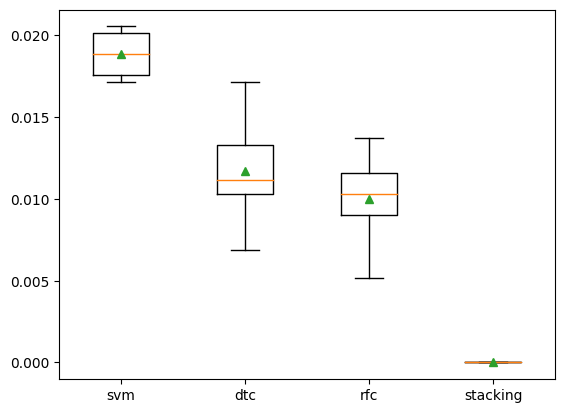

In [ ]:
data = pd.read_csv('train.csv')
data = house_data.loc[:,['GrLivArea','YearBuilt','SalePrice']]
print("Null values of the data is \n{}".format(data.isnull().sum()))

X = data.loc[:,['GrLivArea','YearBuilt']].to_numpy()
y = data.loc[:,['SalePrice']].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=123, test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('svm', SVC()))
    level0.append(('dtc', tree.DecisionTreeClassifier()))
    level0.append(('rfc',RandomForestClassifier(n_estimators=50, random_state=1)))
    # define meta learner model
    level1 = LogisticRegression(multi_class='multinomial', random_state=1)
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['svm'] = SVC()
    models['dtc'] = tree.DecisionTreeClassifier()
    models['rfc'] = RandomForestClassifier(n_estimators=50, random_state=1)
    models['stacking'] = get_stacking()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()